# STFT - Short-term Fourier Transoform 

And the effects of windowing on signals

In [2]:
import sys, os
print(sys.path)

['/Users/atul/Projects/dev-workspace/Audio-Processing/sms-tools/workspace', '/Users/atul/miniconda3/envs/PY39/lib/python39.zip', '/Users/atul/miniconda3/envs/PY39/lib/python3.9', '/Users/atul/miniconda3/envs/PY39/lib/python3.9/lib-dynload', '', '/Users/atul/miniconda3/envs/PY39/lib/python3.9/site-packages']


In [8]:
import numpy as np
import scipy 
from scipy.signal import get_window
from scipy.fftpack import fft
import math 
import matplotlib.pyplot as plt
%matplotlib inline 

In [11]:
# Define FFT / STFT window size
M = 63  # odd windows lead to balanced 
window = scipy.signal.get_window('hann', M)  # new version of scipy uses 'hann' for hanning
hM1 = int(math.floor((M+1)/2))
hM2 = int(math.floor(M/2))

# STFT size
N = 512 #  power of 2, more than M
hN = N/2


In [12]:
# FFT buffer - 
fftbuffer = np.zeros(N)
# place 2nd half of window, and place it at 1st half of buffer...
fftbuffer[:hM1] = window[hM2:]      # zero-padding; flip first- and second-halves
# ... place 1st half of window, place it at 2nd half of buffer
fftbuffer[N-hM2:] = window[:hM2]    # 

In [18]:
# get FFT
X = fft(fftbuffer)
absX = abs(X)
absX[ absX < np.finfo(float).eps ] = np.finfo(float).eps  # ignore v small values
# mag spectra
mX = 20 * np.log10(absX)  # decibels
# phase spectra
pX = np.angle(X)

print(f"len mX {len(mX)}, len pX {len(pX)}")

len mX 512, len pX 512


In [21]:
print(hN)
hN = int(hN)

256.0


In [22]:
## Undo- the zero-padding in the spectra - for plotting
mX1 = np.zeros(N)
pX1 = np.zeros(N)
mX1[:hN] = mX[hN:]
mX1[N-hN: ] = mX[:hN]
pX1[:hN] = pX[hN:]
pX1[N-hN: ] = pX[:hN]


## Plot the windows of STFT

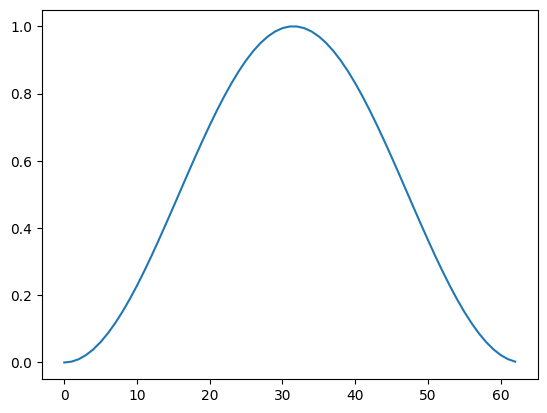

In [25]:
plt.plot(window) # Hanning window

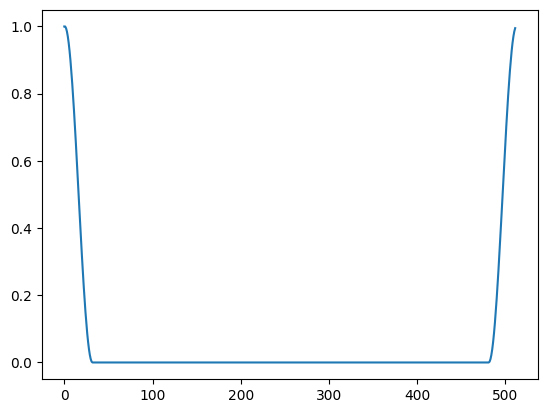

In [26]:
# plot the fft buffer
plt.plot(fftbuffer)

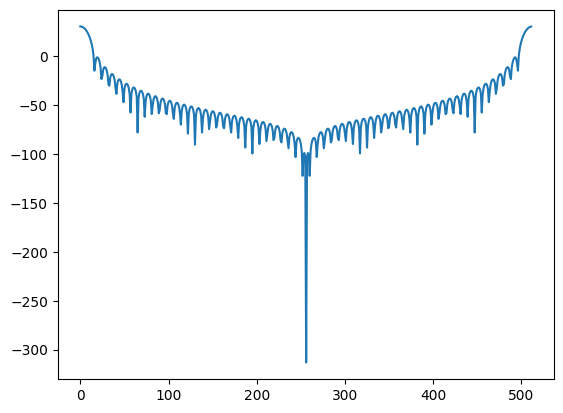

In [27]:
# mag spectra
plt.plot(mX)

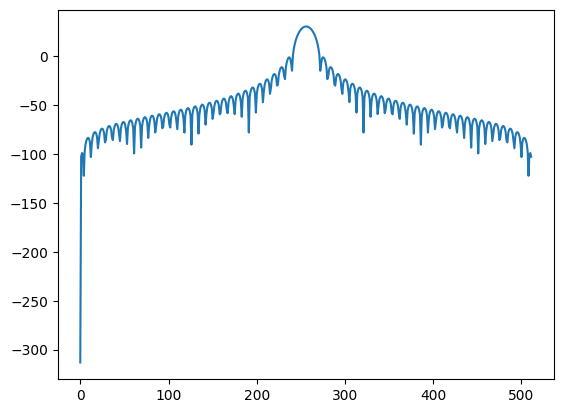

In [28]:
# plot mx1 
plt.plot(mX1)

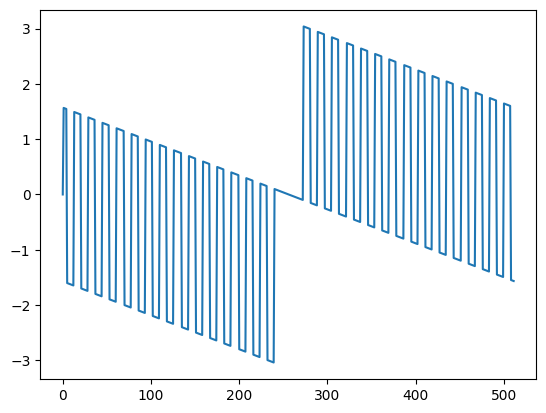

In [29]:
# Phase
plt.plot(pX1)

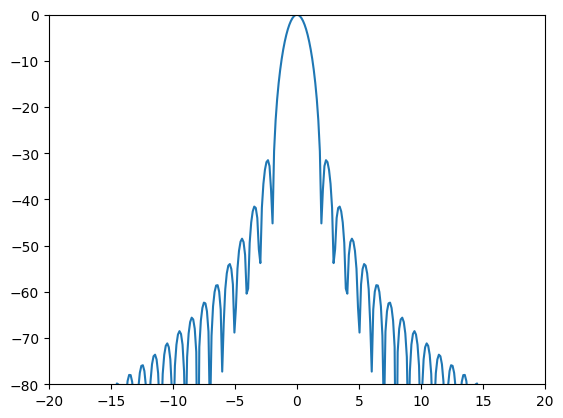

In [30]:
# plot better - show a subset -to see the main lobe and side-lobes
plt.plot(np.arange(-hN, hN)/float(N)*M, mX1-max(mX1))
plt.axis([-20, 20, -80, 0])
plt.show()

Note the side lobes are about -32 dB less than main lobe

In [31]:
## Do this again with Hamming window
# Define FFT / STFT window size
M = 63  # odd windows lead to balanced 
window = scipy.signal.get_window('hamming', M)  # Hamming window
hM1 = int(math.floor((M+1)/2))
hM2 = int(math.floor(M/2))

# STFT size
N = 512 #  power of 2, more than M
hN = int(N/2)

# FFT buffer - 
fftbuffer = np.zeros(N)
# place 2nd half of window, and place it at 1st half of buffer...
fftbuffer[:hM1] = window[hM2:]      # zero-padding; flip first- and second-halves
# ... place 1st half of window, place it at 2nd half of buffer
fftbuffer[N-hM2:] = window[:hM2]    

# get FFT
X = fft(fftbuffer)
absX = abs(X)
absX[ absX < np.finfo(float).eps ] = np.finfo(float).eps  # ignore v small values
# mag spectra
mX = 20 * np.log10(absX)  # decibels
# phase spectra
pX = np.angle(X)

## Undo- the zero-padding in the spectra - for plotting
mX1 = np.zeros(N)
pX1 = np.zeros(N)
mX1[:hN] = mX[hN:]
mX1[N-hN: ] = mX[:hN]
pX1[:hN] = pX[hN:]
pX1[N-hN: ] = pX[:hN]

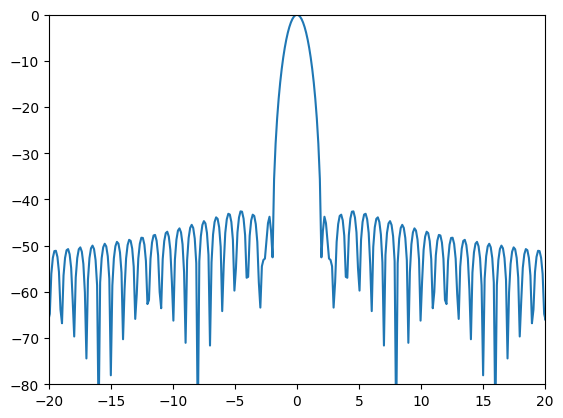

In [32]:
## plots
# plot better - show a subset -to see the main lobe and side-lobes
plt.plot(np.arange(-hN, hN)/float(N)*M, mX1-max(mX1))
plt.axis([-20, 20, -80, 0])
plt.show()

#### For Hamming window
The main lobe is abour 4 bins, and side lobes is about -49 dB

## Blackman-Harris window


In [33]:
## Do this again with Hamming window
# Define FFT / STFT window size
M = 63  # odd windows lead to balanced 
window = scipy.signal.get_window('blackmanharris', M)  # Blackman-Harris window
hM1 = int(math.floor((M+1)/2))
hM2 = int(math.floor(M/2))

# STFT size
N = 512 #  power of 2, more than M
hN = int(N/2)

# FFT buffer - 
fftbuffer = np.zeros(N)
# place 2nd half of window, and place it at 1st half of buffer...
fftbuffer[:hM1] = window[hM2:]      # zero-padding; flip first- and second-halves
# ... place 1st half of window, place it at 2nd half of buffer
fftbuffer[N-hM2:] = window[:hM2]    

# get FFT
X = fft(fftbuffer)
absX = abs(X)
absX[ absX < np.finfo(float).eps ] = np.finfo(float).eps  # ignore v small values
# mag spectra
mX = 20 * np.log10(absX)  # decibels
# phase spectra
pX = np.angle(X)

## Undo- the zero-padding in the spectra - for plotting
mX1 = np.zeros(N)
pX1 = np.zeros(N)
mX1[:hN] = mX[hN:]
mX1[N-hN: ] = mX[:hN]
pX1[:hN] = pX[hN:]
pX1[N-hN: ] = pX[:hN]

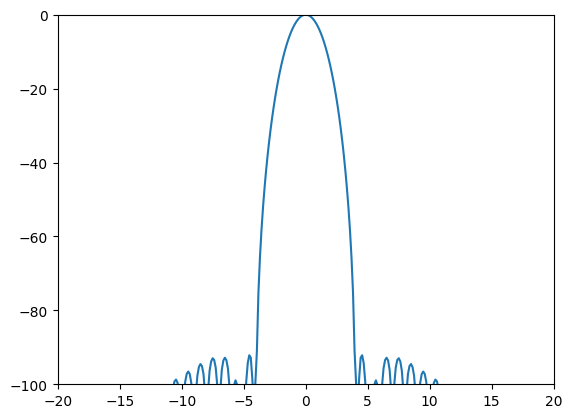

In [35]:
## plot - needs wider to show side lobes
# plot better - show a subset -to see the main lobe and side-lobes
plt.plot(np.arange(-hN, hN)/float(N)*M, mX1-max(mX1))
plt.axis([-20, 20, -100, 0])
plt.show()

We can clearly see the side lobes are very low, around -92 dB, and main lobe is +/- 4

##  Sinusoid 
Let's analyze a sinusoid now

In [37]:
## import our SMS-tools models
sys.path.append(os.path.join(os.getcwd(), '../software/models/'))
print(sys.path)

['/Users/atul/Projects/dev-workspace/Audio-Processing/sms-tools/workspace', '/Users/atul/miniconda3/envs/PY39/lib/python39.zip', '/Users/atul/miniconda3/envs/PY39/lib/python3.9', '/Users/atul/miniconda3/envs/PY39/lib/python3.9/lib-dynload', '', '/Users/atul/miniconda3/envs/PY39/lib/python3.9/site-packages', '/Users/atul/Projects/dev-workspace/Audio-Processing/sms-tools/workspace/../software/models/']


In [38]:
import dftModel as DFT  # this is our SMS-Tools 

In [39]:
# our signal 
fs = 44100
f = 5000.0  # Hz 
M = 101  # window size
N = 512  # DFT size
# our sinusoid signal below
x = np.cos(2 * np.pi * f * np.arange(M)/float(fs))
# window
w = get_window('hamming', M)
# get spectra
mX, pX = DFT.dftAnal(x, w, N)

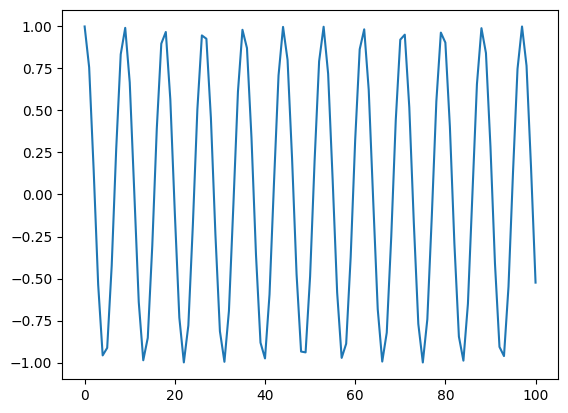

In [41]:
## plot x
plt.plot(x)

In [53]:
kk = np.arange(0, fs/2, fs/float(N))
print(len(kk))

256


In [56]:
print(kk)

[    0.           86.1328125   172.265625    258.3984375   344.53125
   430.6640625   516.796875    602.9296875   689.0625      775.1953125
   861.328125    947.4609375  1033.59375    1119.7265625  1205.859375
  1291.9921875  1378.125      1464.2578125  1550.390625   1636.5234375
  1722.65625    1808.7890625  1894.921875   1981.0546875  2067.1875
  2153.3203125  2239.453125   2325.5859375  2411.71875    2497.8515625
  2583.984375   2670.1171875  2756.25       2842.3828125  2928.515625
  3014.6484375  3100.78125    3186.9140625  3273.046875   3359.1796875
  3445.3125     3531.4453125  3617.578125   3703.7109375  3789.84375
  3875.9765625  3962.109375   4048.2421875  4134.375      4220.5078125
  4306.640625   4392.7734375  4478.90625    4565.0390625  4651.171875
  4737.3046875  4823.4375     4909.5703125  4995.703125   5081.8359375
  5167.96875    5254.1015625  5340.234375   5426.3671875  5512.5
  5598.6328125  5684.765625   5770.8984375  5857.03125    5943.1640625
  6029.296875   6115.4

In [58]:
fs/float(N)

86.1328125

In [60]:
kp = np.arange(0, fs/2 + 1, fs/float(N))
print(len(kp))

257


In [49]:
print(len(mX))
print(mX.shape)
print(mX.ndim)

257
(257,)
1


In [55]:
print(mX-max(mX))

[-47.95613146 -49.63928209 -55.9517353  -55.85251406 -49.53229816
 -47.82493836 -49.49237469 -55.92137304 -55.70549865 -49.21051738
 -47.44317678 -49.07275554 -55.65893191 -55.57069292 -48.72130494
 -46.8429442  -48.39048373 -55.06615166 -55.49668429 -48.11277881
 -46.07042023 -47.48558253 -54.09818485 -55.53630498 -47.43708041
 -45.18661225 -46.42917203 -52.8092009  -55.77238032 -46.77465565
 -44.29314143 -45.35104497 -51.38452457 -56.3798626  -46.32461989
 -43.64741408 -44.58648857 -50.29057205 -57.84824904 -46.84701602
 -44.28883462 -45.56420731 -51.34026758 -62.34567219 -53.96153798
 -48.9953053  -43.4994583  -42.37406691 -59.93753822 -31.23123883
 -21.871986   -15.5948502  -10.92270421  -7.34061164  -4.60040542
  -2.56335055  -1.14664298  -0.30095839   0.          -0.23572889
  -1.01698097  -2.37086489  -4.34749583  -7.03022825 -10.55723572
 -15.17154052 -21.3618367  -30.4364067  -51.63607115 -44.56759886
 -46.26449455 -49.72619289 -49.13193243 -56.61202603 -51.57604021
 -43.74856

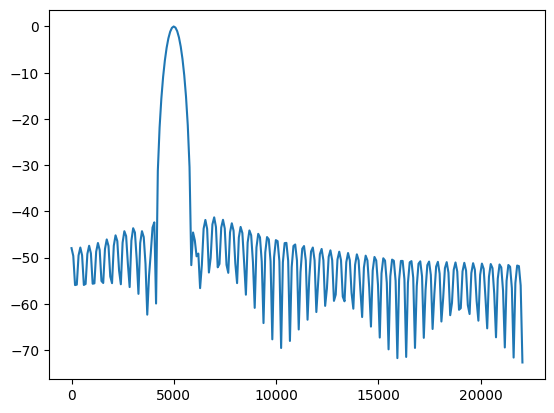

In [61]:
# plot spectra
plt.plot(np.arange(0, fs/2 + 1, fs/float(N)), mX-max(mX))

When we analyze the sinusoid, we see the spectra centered at its frequency (5000.0); it is the shape of the sinusoid. We see the the transform of the window, with its amplitude. 

## Blackman-Harris window on our sinusoid

In [62]:
# our signal 
fs = 44100
f = 5000.0  # Hz 
M = 101  # window size
N = 512  # DFT size
# our sinusoid signal below
x = np.cos(2 * np.pi * f * np.arange(M)/float(fs))
# window
w = get_window('blackmanharris', M)
# get spectra
mX, pX = DFT.dftAnal(x, w, N)

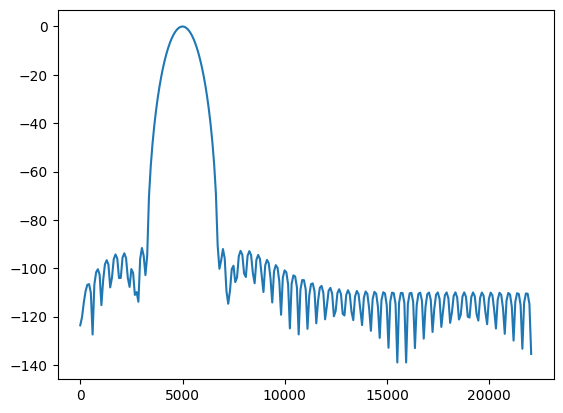

In [63]:
# plot spectra
plt.plot(np.arange(0, fs/2 + 1, fs/float(N)), mX-max(mX))

Clearly shows the effect of the Blackman Harris window - on our sinusoid signal